In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Data Exploration: Analyzing feature distributions and understanding the imbalance between fraud and non-fraud classes.

Outlier Detection: Using boxplots to identify outliers in transaction amounts.

Anomaly Detection: Applying Isolation Forest to detect anomalous transactions based on Amount and Time.

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, ttest_ind, mannwhitneyu, zscore
from sklearn.ensemble import IsolationForest

**Load Data**

In [5]:
credit_data=pd.read_csv('creditcard.csv')

**Data Analysis**

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51591 entries, 0 to 51590
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    51591 non-null  int64  
 1   V1      51591 non-null  float64
 2   V2      51591 non-null  float64
 3   V3      51591 non-null  float64
 4   V4      51591 non-null  float64
 5   V5      51591 non-null  float64
 6   V6      51591 non-null  float64
 7   V7      51591 non-null  float64
 8   V8      51591 non-null  float64
 9   V9      51591 non-null  float64
 10  V10     51591 non-null  float64
 11  V11     51590 non-null  float64
 12  V12     51590 non-null  float64
 13  V13     51590 non-null  float64
 14  V14     51590 non-null  float64
 15  V15     51590 non-null  float64
 16  V16     51590 non-null  float64
 17  V17     51590 non-null  float64
 18  V18     51590 non-null  float64
 19  V19     51590 non-null  float64
 20  V20     51590 non-null  float64
 21  V21     51590 non-null  float64
 22

In [8]:
credit_data['Class'].value_counts()

,count
Class,
0.0,51440
1.0,150


In [9]:
credit_data['Class'].value_counts(normalize=True)*100

,proportion
Class,
0.0,99.709246
1.0,0.290754


**Data CleanUp**
Drop Null values
Drop Duplicates

In [10]:
credit_data.dropna(inplace=True)

In [11]:
credit_data.duplicated().sum()

np.int64(226)

**Visualization of Class Imbalance**

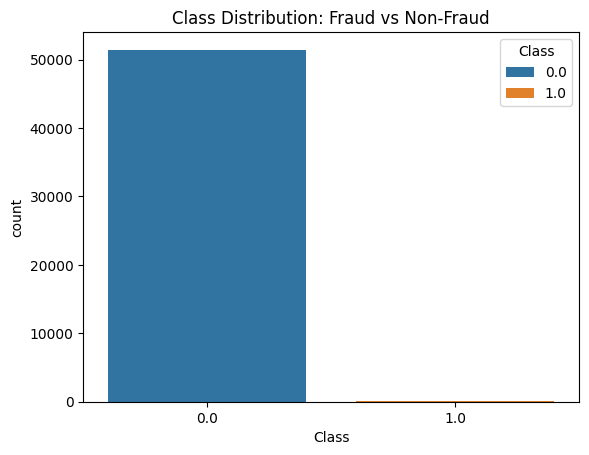

In [13]:
sns.countplot(x='Class',data=credit_data,hue='Class')
plt.title("Class Distribution: Fraud vs Non-Fraud")
plt.show()

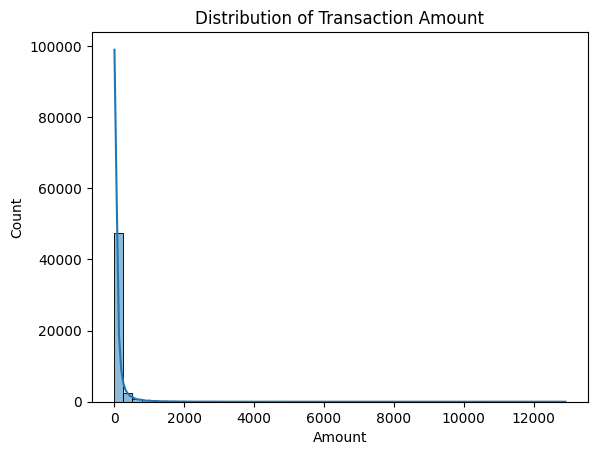

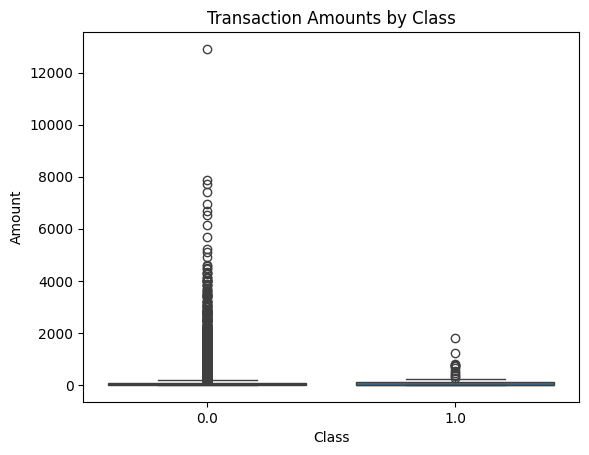

Skewness of Amount: 11.745723295907467
Kurtosis of Amount: 279.58792401717693


In [14]:
sns.histplot(credit_data['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.show()

sns.boxplot(x='Class', y='Amount', data=credit_data)
plt.title("Transaction Amounts by Class")
plt.show()

print("Skewness of Amount:", skew(credit_data['Amount']))
print("Kurtosis of Amount:", kurtosis(credit_data['Amount']))

**Hypothesis Testing: Fraud vs Non-Fraud (Amount)**

In [15]:
fraud = credit_data[credit_data['Class'] == 1]['Amount']
nonfraud = credit_data[credit_data['Class'] == 0]['Amount']

# T-test
t_stat, p_value = ttest_ind(fraud, nonfraud, equal_var=False)
print(f"T-test: t = {t_stat:.2f}, p = {p_value:.5f}")

# Mann-Whitney U test (non-parametric)
u_stat, p_u = mannwhitneyu(fraud, nonfraud)
print(f"Mann-Whitney U: U = {u_stat}, p = {p_u:.5f}")
if p_u<0.05:
    print('Reject the null hypothesis → Fraud and non-fraud amounts are likely from different distributions')

else:
    print('Fail to reject the null hypothesis → No evidence of a difference')

T-test: t = 0.26, p = 0.79874
Mann-Whitney U: U = 3170466.5, p = 0.00016
Reject the null hypothesis → Fraud and non-fraud amounts are likely from different distributions


**Correlation Heatmap with each and every features**

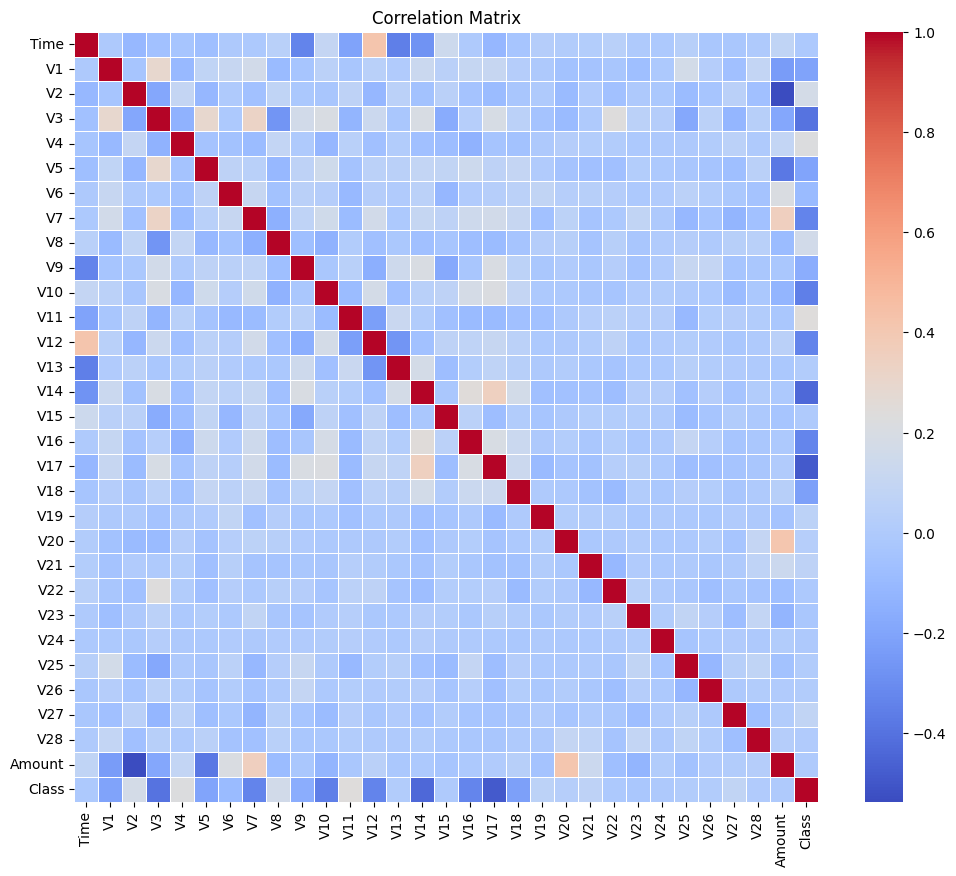

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(credit_data.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Outlier Detection using BoxPlot**

-110.03999999999999 203.88


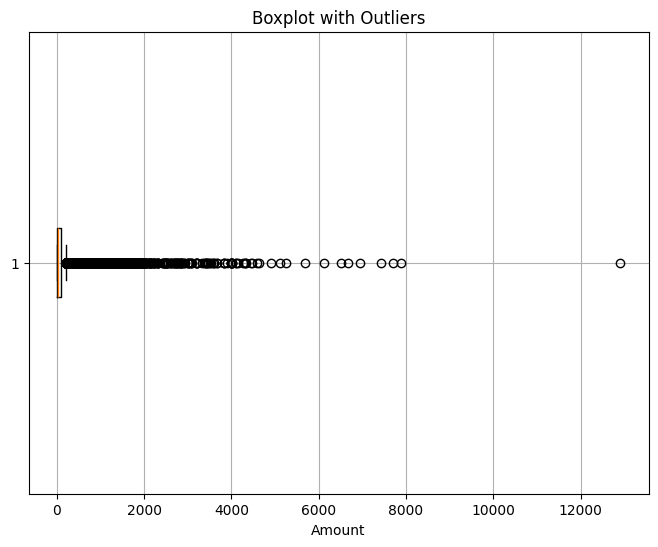

Total Data Count 51590
Normal Data Count 46203
Outlier Data Count 5387


In [17]:
Q1 = np.percentile(credit_data['Amount'], 25)
Q3 = np.percentile(credit_data['Amount'], 75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)
# Detect outliers
outliers_iqr = credit_data['Amount'][(credit_data['Amount'] < lower_bound) | (credit_data['Amount'] > upper_bound)]


plt.figure(figsize=(8, 6))
plt.boxplot(x=credit_data['Amount'], vert=False)
plt.title("Boxplot with Outliers")
plt.xlabel("Amount")
plt.grid(True)
plt.show()
print('Total Data Count',len(credit_data['Amount']))
print('Normal Data Count',len(credit_data['Amount'])-len(outliers_iqr))
print('Outlier Data Count',len(outliers_iqr))

**Skewness & Kurtosis Analysis of PCA Features (V1–V28)**

In [18]:
for col in credit_data.columns[1:29]:
    print(f"{col}: Skew={skew(credit_data[col]):.2f}, Kurtosis={kurtosis(credit_data[col]):.2f}")

V1: Skew=-4.41, Kurtosis=50.79
V2: Skew=-4.71, Kurtosis=132.88
V3: Skew=-6.42, Kurtosis=89.07
V4: Skew=0.48, Kurtosis=2.90
V5: Skew=-1.42, Kurtosis=75.54
V6: Skew=0.98, Kurtosis=16.35
V7: Skew=-2.01, Kurtosis=92.80
V8: Skew=-5.68, Kurtosis=154.12
V9: Skew=0.50, Kurtosis=3.22
V10: Skew=-0.25, Kurtosis=34.56
V11: Skew=0.70, Kurtosis=4.39
V12: Skew=-2.28, Kurtosis=16.27
V13: Skew=0.17, Kurtosis=-0.04
V14: Skew=-3.34, Kurtosis=39.09
V15: Skew=-0.59, Kurtosis=0.44
V16: Skew=-2.22, Kurtosis=20.91
V17: Skew=-6.72, Kurtosis=120.99
V18: Skew=-0.72, Kurtosis=6.09
V19: Skew=-0.08, Kurtosis=0.97
V20: Skew=1.78, Kurtosis=106.64
V21: Skew=5.28, Kurtosis=217.19
V22: Skew=-0.56, Kurtosis=5.75
V23: Skew=-4.60, Kurtosis=281.53
V24: Skew=-0.59, Kurtosis=0.84
V25: Skew=-0.58, Kurtosis=5.13
V26: Skew=0.69, Kurtosis=0.15
V27: Skew=-1.34, Kurtosis=95.99
V28: Skew=16.12, Kurtosis=2234.36


**Anomaly Detection with Isolation Forest**

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

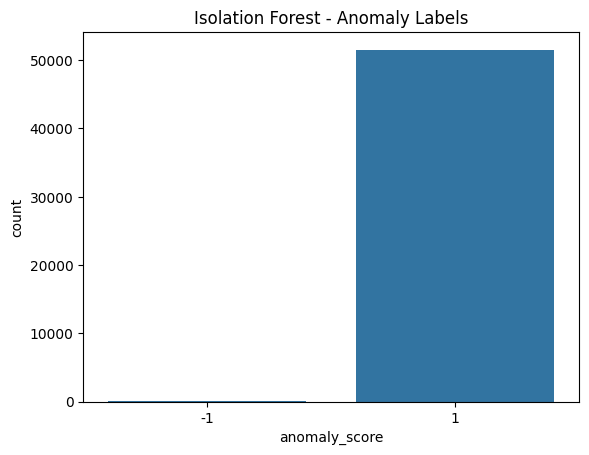

In [20]:
model = IsolationForest(contamination=0.001)
credit_data['anomaly_score'] = model.fit_predict(credit_data[['Amount', 'Time']])
sns.countplot(x=credit_data['anomaly_score'])
plt.title("Isolation Forest - Anomaly Labels")
plt.show()

**Compare Fraud vs Non-Fraud Distributions (V1 to V5 Example)**

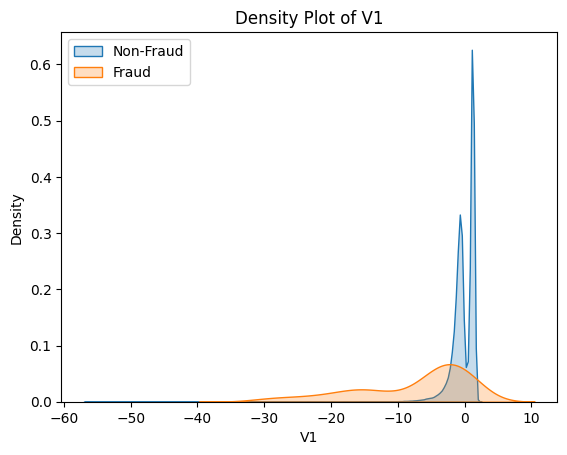

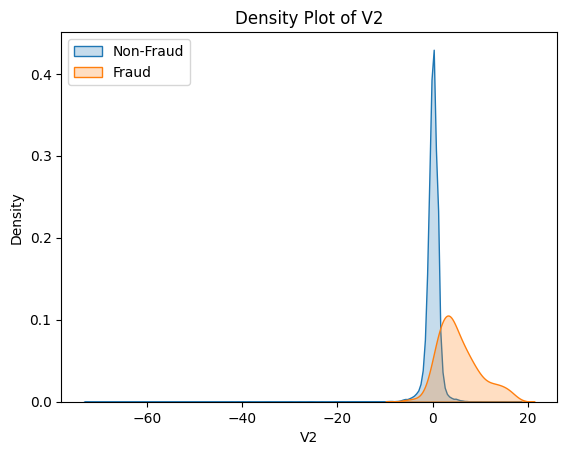

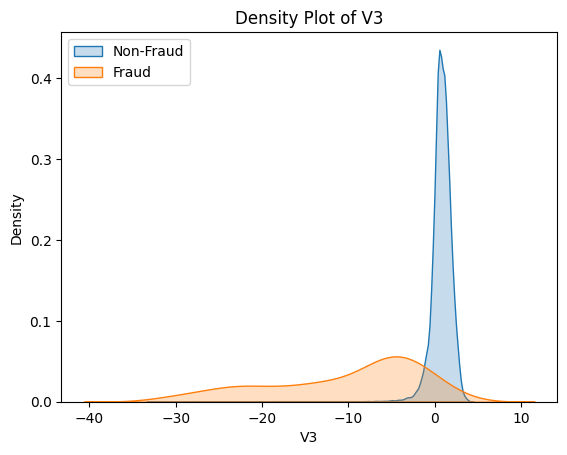

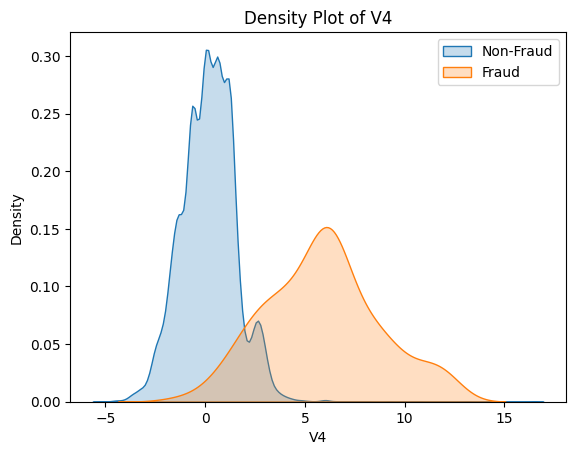

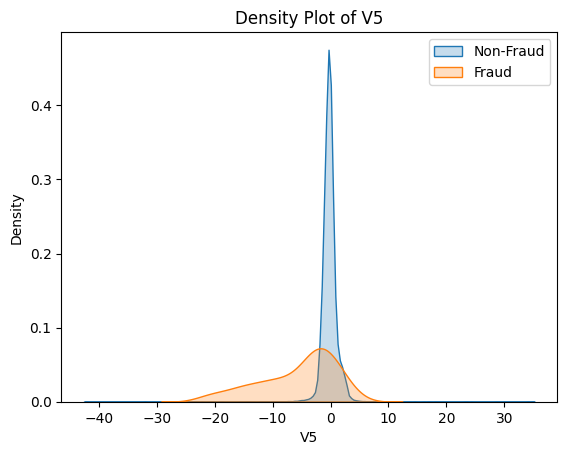

In [21]:
for v in ['V1', 'V2', 'V3', 'V4', 'V5']:
    sns.kdeplot(data=credit_data[credit_data['Class'] == 0][v], label='Non-Fraud', fill=True)
    sns.kdeplot(data=credit_data[credit_data['Class'] == 1][v], label='Fraud', fill=True)
    plt.title(f"Density Plot of {v}")
    plt.legend()
    plt.show()